Install TensorFlow

In [ ]:
!pip install tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 657.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uni

Load The Dataset

In [2]:
from tensorflow.keras.datasets import cifar10
(trainImages, trainLabels), (testImages, testLabels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Normalize Pixel Values For All Images

In [3]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0

print("Training data shape:", trainImages.shape)
print("Training labels shape:", trainLabels.shape)
print("Test data shape:", testImages.shape)
print("Test labels shape:", testLabels.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


Visualize Images

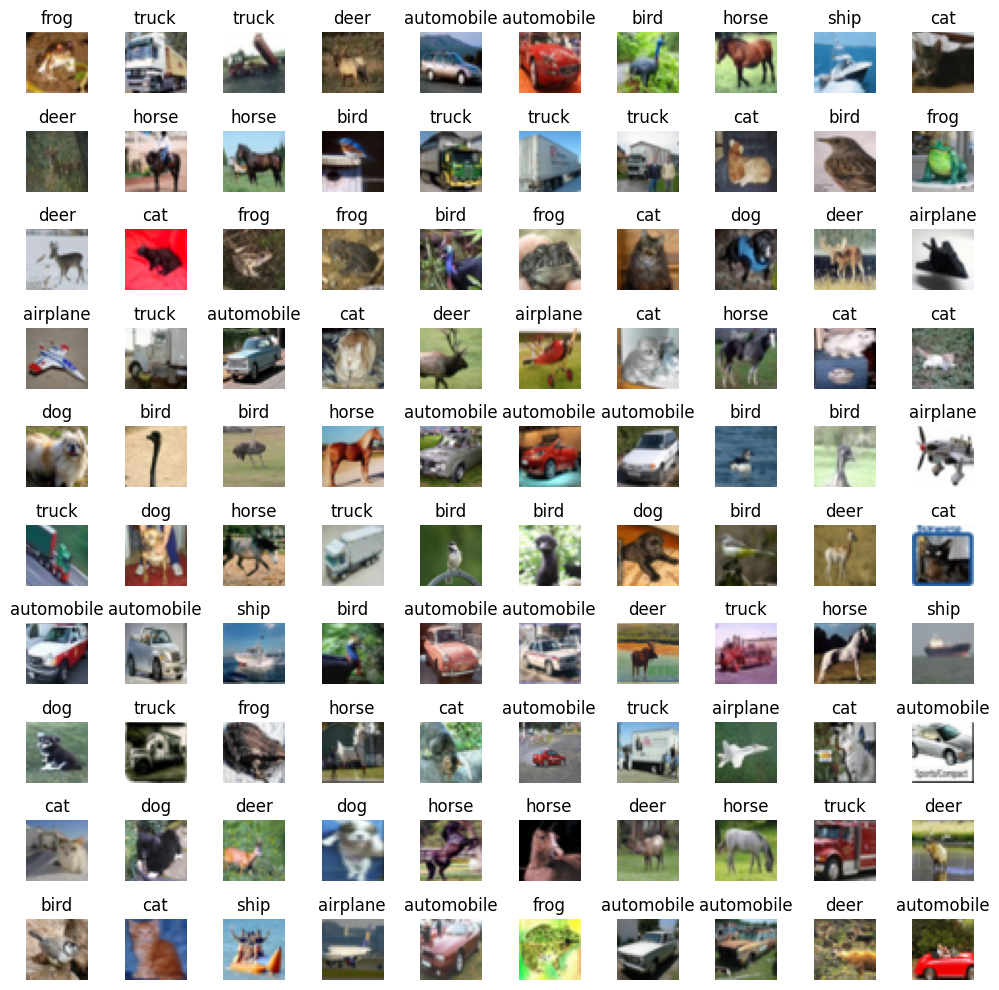

In [4]:
import matplotlib.pyplot as plt

# Number of rows and columns
rows = 10
cols = 10

#Used to display actual name of the images without encoding them
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Create a figure to display a grid of images
plt.figure(figsize=(10, 10))


#Iterate through rows and columns
for i in range(rows * cols):


    # Subplot for each image
    plt.subplot(rows, cols, i + 1)

    # Display the image
    plt.imshow(trainImages[i])


    #Get index of the image and then display the appropriate label
    indexOfImage = trainLabels[i][0]
    plt.title(f"{labels[indexOfImage]}")

    # Remove axis for better visualization
    plt.axis('off')

# Adjust spacing to prevent overlap of titles and images
plt.tight_layout()

# Display the grid of images
plt.show()


Building the Model using CNN's



In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


'''
NOTE FOR CONVOLUTIONAL LAYER
    Filters: 16 convolutional filters to be used
    kernelSize : Dimensions of convolutional filters, 3x3 in this case
    activation: ReLu most common, ensures only positive values
    input_shape: The shape of the input images (32x32 pixels with 3 color channels)
'''

model = Sequential([
    # Convolutional Layer
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

   Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Fit Model

In [9]:
# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


print(f'\nMODEL TRAINING:')
history = model.fit(trainImages, trainLabels, epochs=10,
                    validation_data=(testImages, testLabels))



MODEL TRAINING:
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 31ms/step - accuracy: 0.3358 - loss: 1.7911 - val_accuracy: 0.5382 - val_loss: 1.2971
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.5485 - loss: 1.2693 - val_accuracy: 0.5557 - val_loss: 1.2378
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.6097 - loss: 1.1119 - val_accuracy: 0.6287 - val_loss: 1.0570
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6465 - loss: 1.0095 - val_accuracy: 0.6384 - val_loss: 1.0256
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.6742 - loss: 0.9349 - val_accuracy: 0.6581 - val_loss: 0.9742
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.6954 - loss: 0.8697 - val_accuracy: 0.6376 - val_loss: 1.0661
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7148 - loss: 0.8155 - val_accuracy: 0.6832 - val_loss: 0.9077
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - a

Evaluate Model

In [10]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(testImages, testLabels)


MODEL EVALUATION:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6956 - loss: 0.8913


Next Steps: Data Augmentation to improve test accuracy.

Conslusions: 75% train accuracy and APROX 70% test Accuracy